In [1]:
import uproot
import matplotlib
import matplotlib.pyplot as plt
import awkward as ak
import hist
import numpy as np
from event_display import gdml_read_ecal_info
import os
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import crystalball, norm
from epi_analysis import df_make_separation

%matplotlib inline
matplotlib.rc("figure", dpi=200)

dir_path = os.path.dirname(os.path.realpath("__file__"))
print(f"Believed path is: {dir_path}")

Believed path is: /home/romanov/eic/kak-bog-cherepahu/analysis


In [2]:
import pandas as pd

all_vals_df = pd.read_feather("/mnt/work/data/epi/21x21/2022_12_05_cherepaha_PbWO4_21x21_20x20x200mm_0.7-18GeV_e-pi-_20kev-each.feather")
all_vals_df["e_div_p"] = all_vals_df.de_sum/(all_vals_df.p*1000)
all_vals_df.head()
epi_title = "E/P SciGlass"

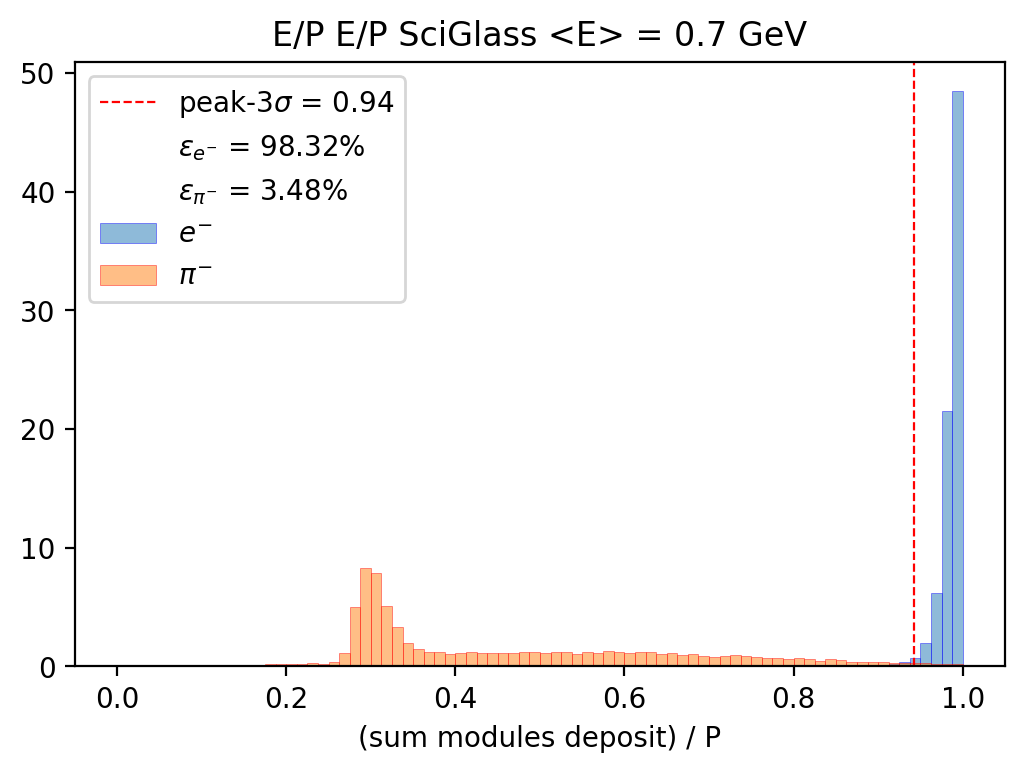

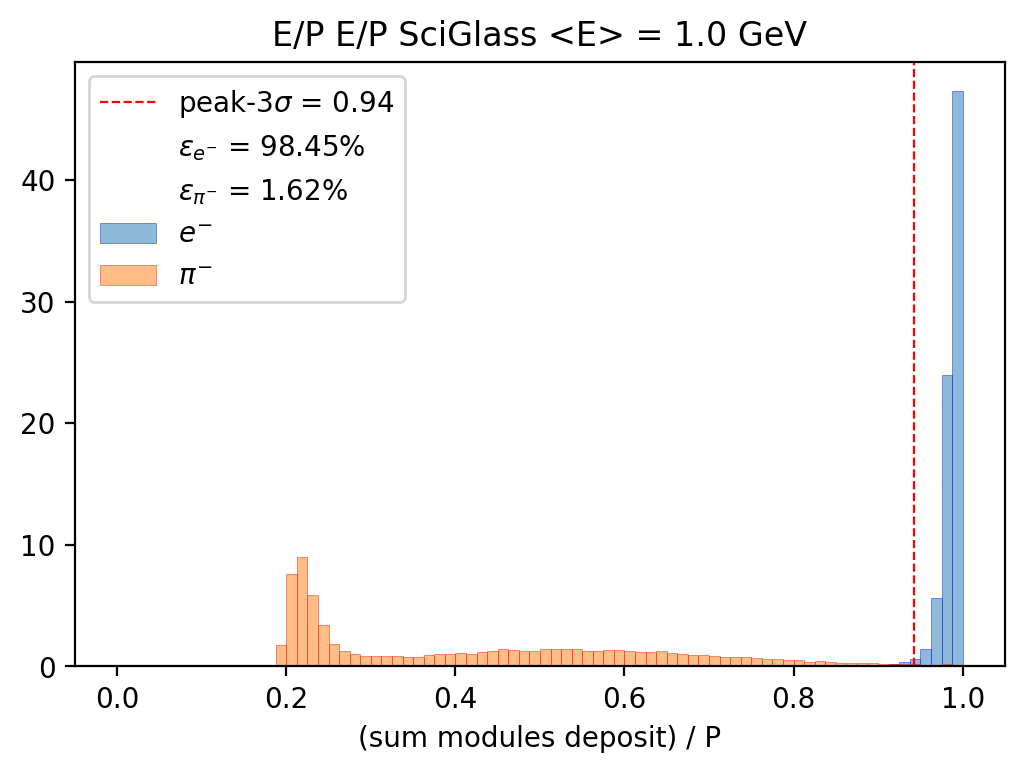

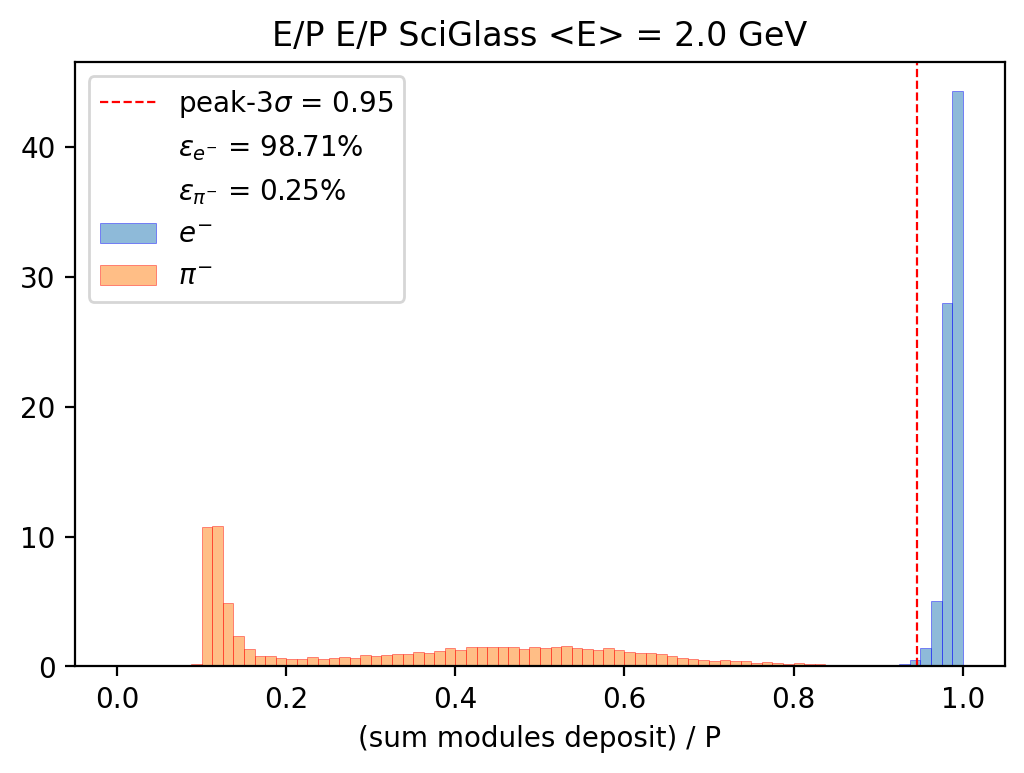

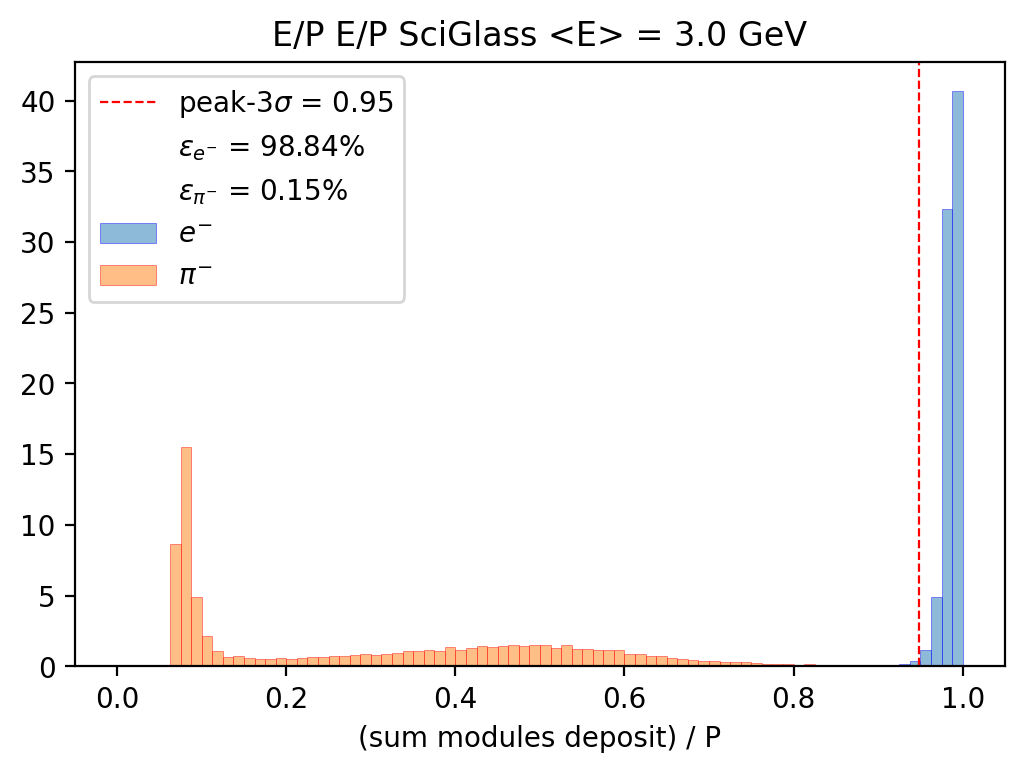

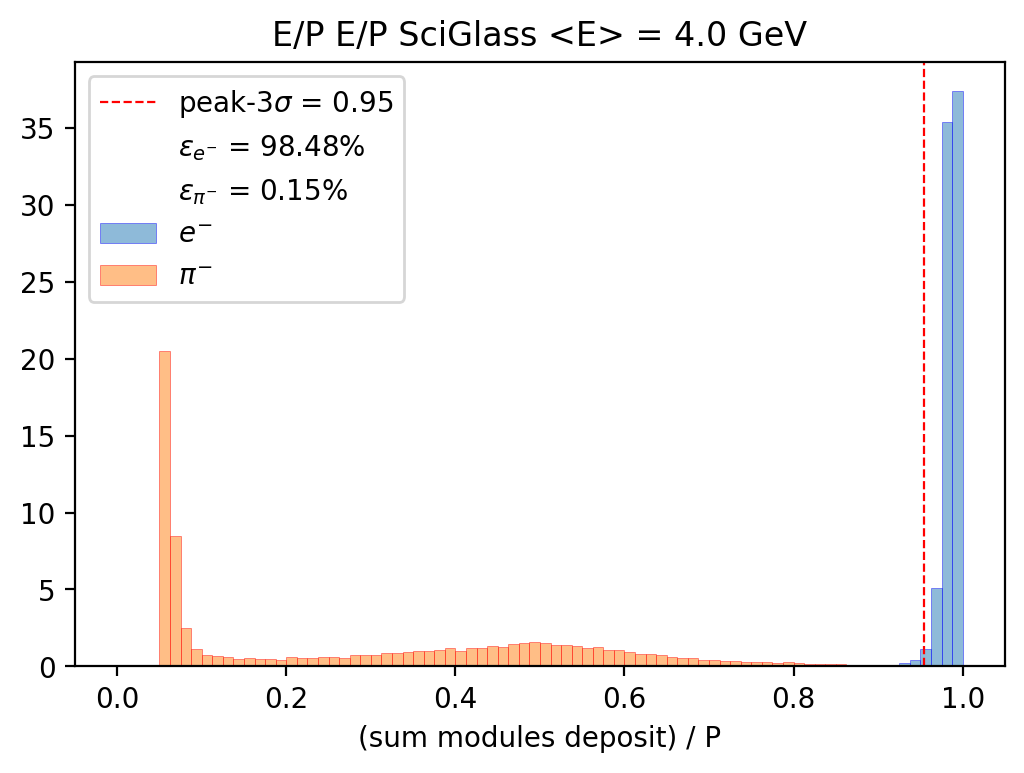

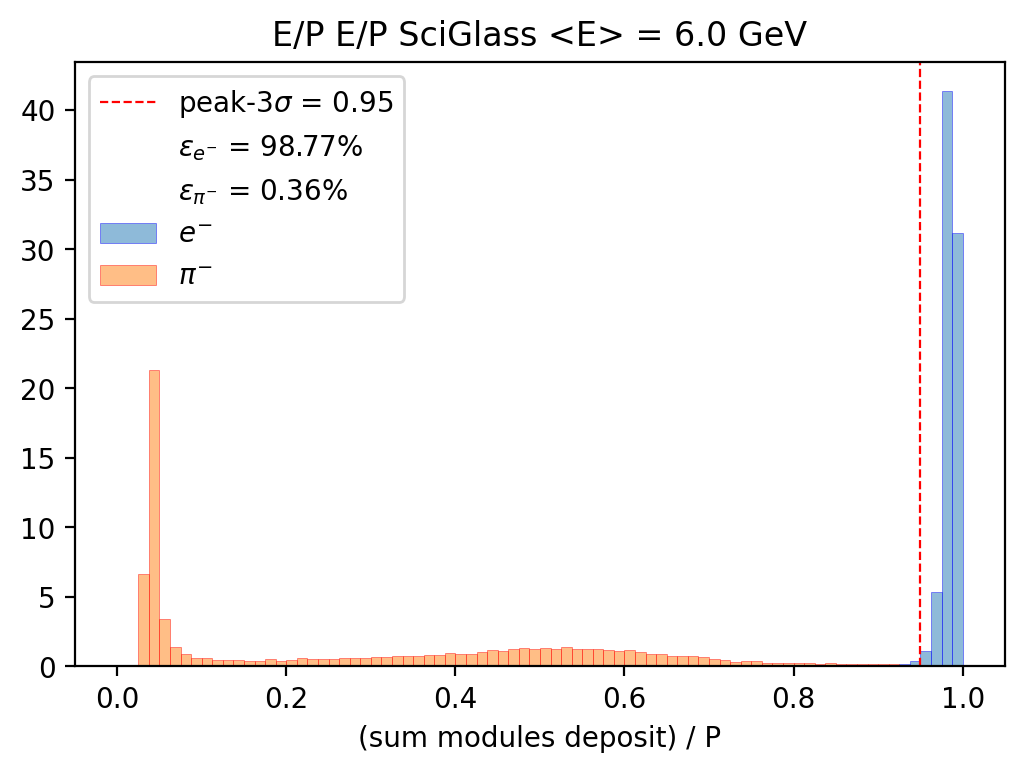

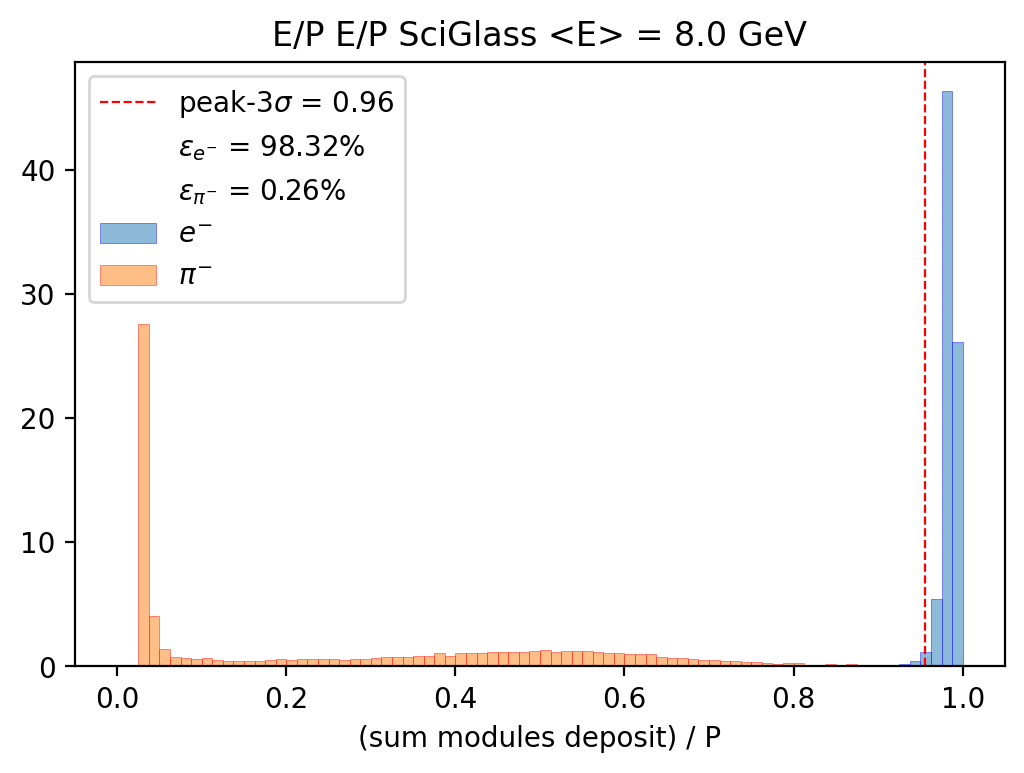

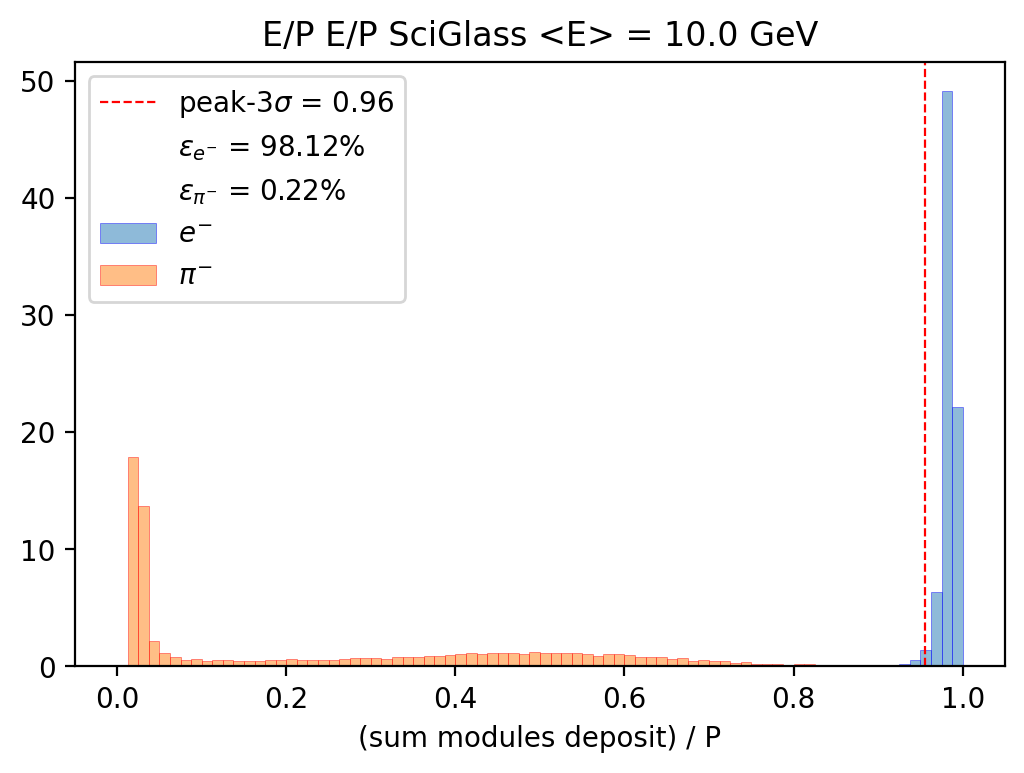

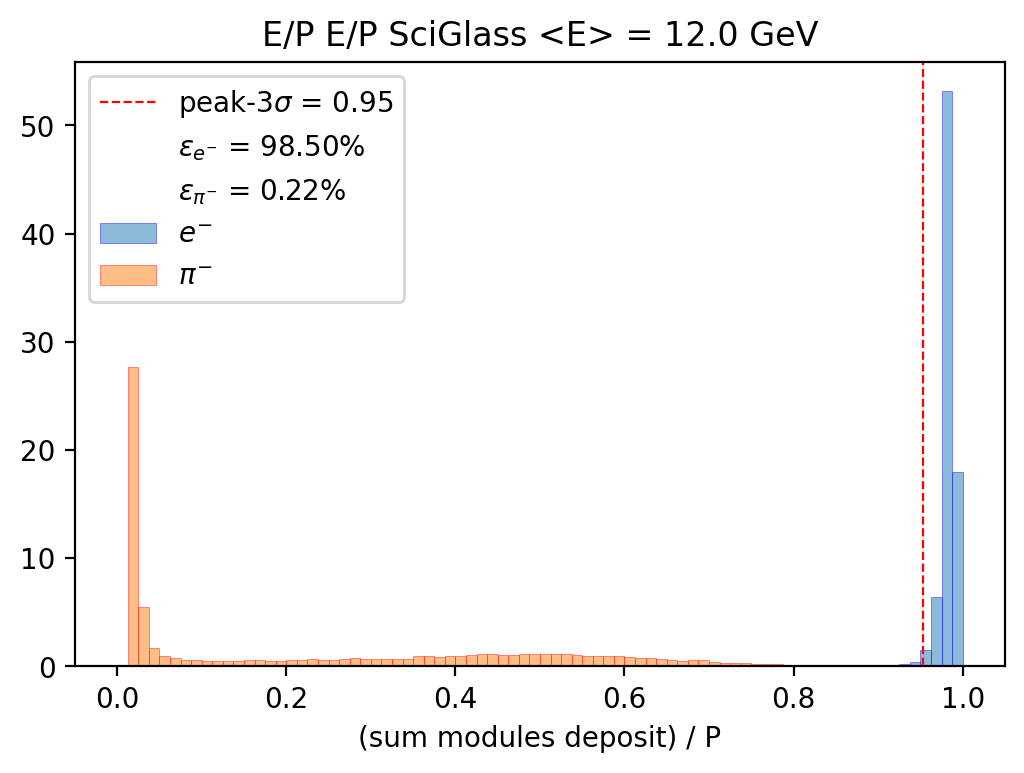

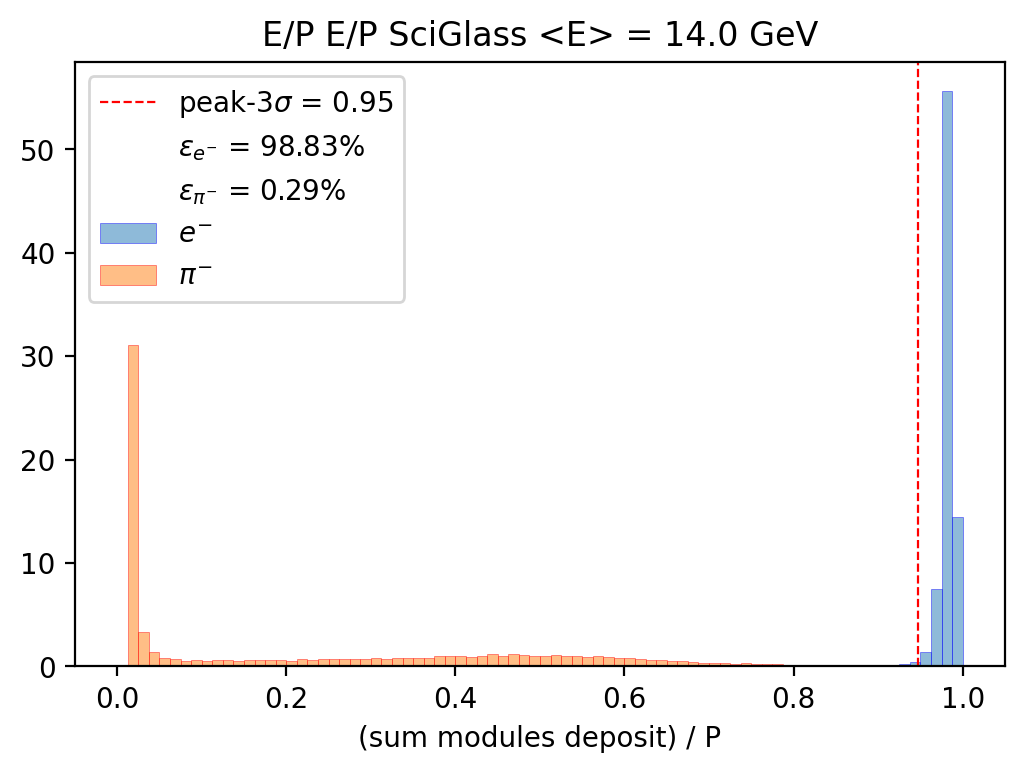

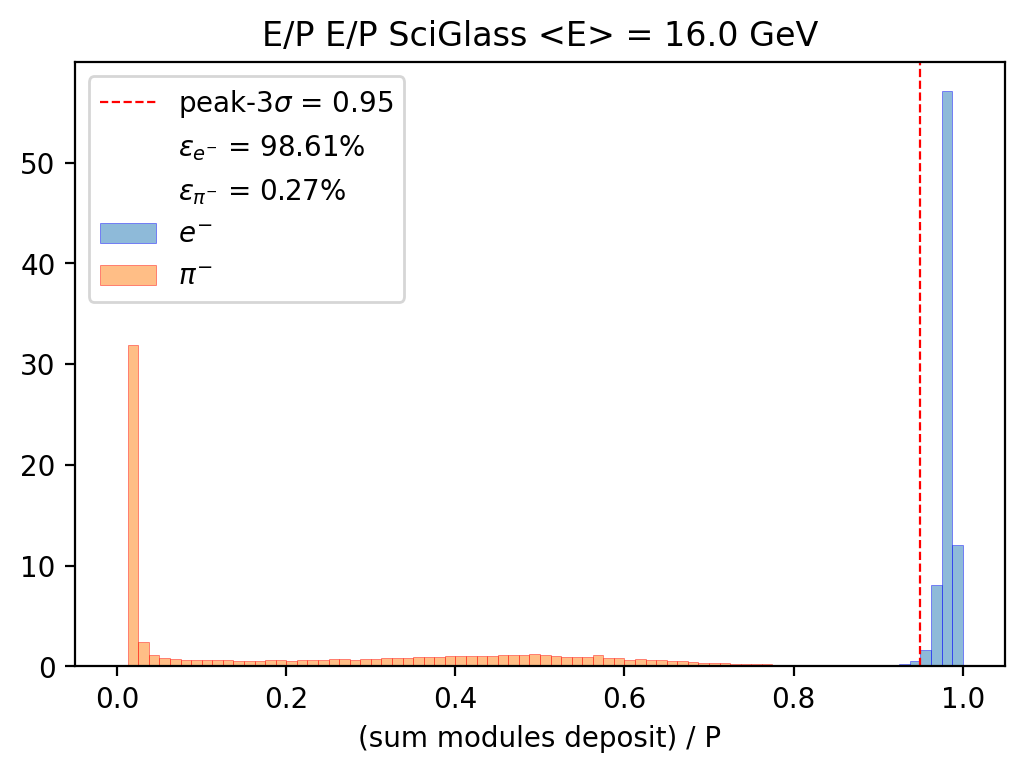

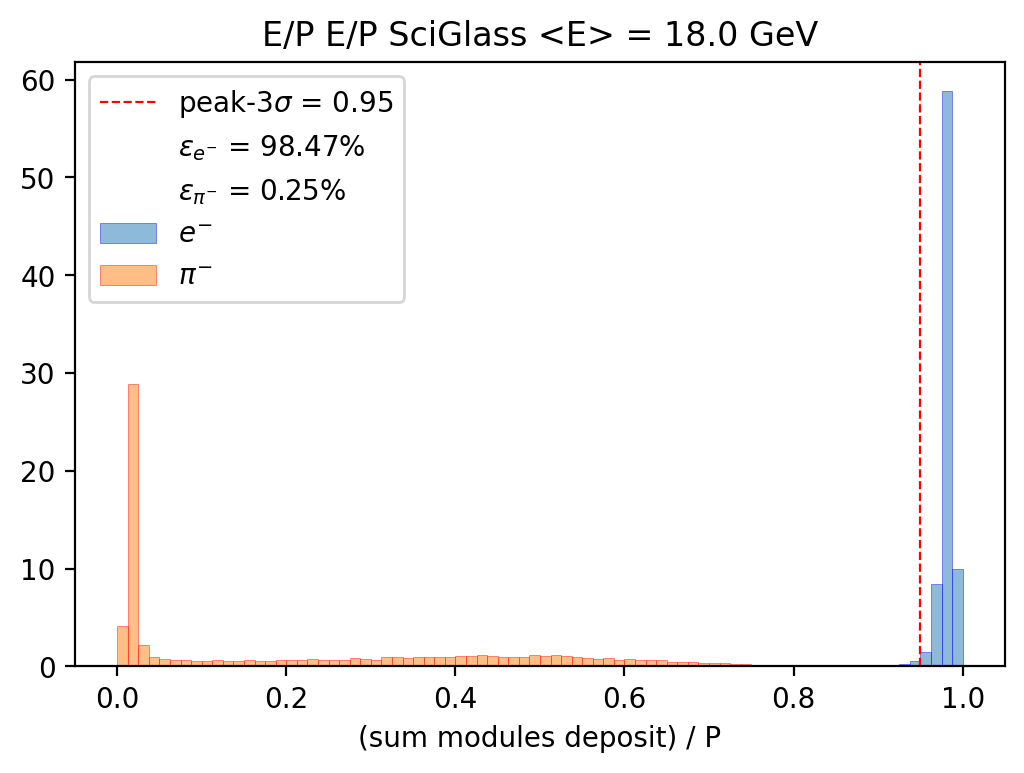

In [3]:
all_momentums = all_vals_df.groupby("p").mean().index

results_list = []

for p in all_momentums:
    cb_loc, norm_sigma, separ_x, n_e_above_num, n_e_above, n_pi_above_num, n_pi_above, n_e_below_num, n_e_below, fig, axs = df_make_separation(all_vals_df, p, epi_title, separ_sigmas=2)
    data={
        "p":p,
        "cb_loc": cb_loc, 
        "norm_sigma": norm_sigma, 
        "separ_x": separ_x,
        "n_e_above_num": n_e_above_num, 
        "n_e_above": n_e_above, 
        "n_pi_above_num": n_pi_above_num, 
        "n_pi_above": n_pi_above, 
        "n_e_below_num":n_e_below_num, 
        "n_e_below:":n_e_below, 
        "fig": fig,
        "axs": axs
    }
    results_list.append(data)
    
results = pd.DataFrame(results_list)

In [4]:
results["rfactor"] = results.n_e_above/results.n_pi_above
results

,p,cb_loc,norm_sigma,separ_x,n_e_above_num,n_e_above,n_pi_above_num,n_pi_above,n_e_below_num,n_e_below:,fig,axs,rfactor
0,0.7,0.995654,0.017715,0.942509,19664,0.98320,696,0.03480,336,0.01680,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",28.252874
1,1.0,0.993296,0.016922,0.942531,19691,0.98455,324,0.01620,309,0.01545,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",60.774691
2,2.0,0.991032,0.014942,0.946208,19742,0.98710,50,0.00250,258,0.01290,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",394.840000
3,3.0,0.989489,0.013713,0.948351,19769,0.98845,30,0.00150,231,0.01155,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",658.966667
4,4.0,0.988879,0.011722,0.953712,19697,0.98485,31,0.00155,303,0.01515,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",635.387097
5,6.0,0.987627,0.012508,0.950102,19754,0.98770,71,0.00355,246,0.01230,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",278.225352
6,8.0,0.986946,0.010438,0.955632,19665,0.98325,52,0.00260,335,0.01675,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",378.173077
7,10.0,0.986810,0.010296,0.955923,19624,0.98120,45,0.00225,376,0.01880,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",436.088889
8,12.0,0.985700,0.010784,0.953347,19701,0.98505,45,0.00225,299,0.01495,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",437.800000
9,14.0,0.985355,0.012611,0.947522,19765,0.98825,57,0.00285,235,0.01175,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",346.754386


<AxesSubplot:xlabel='p'>

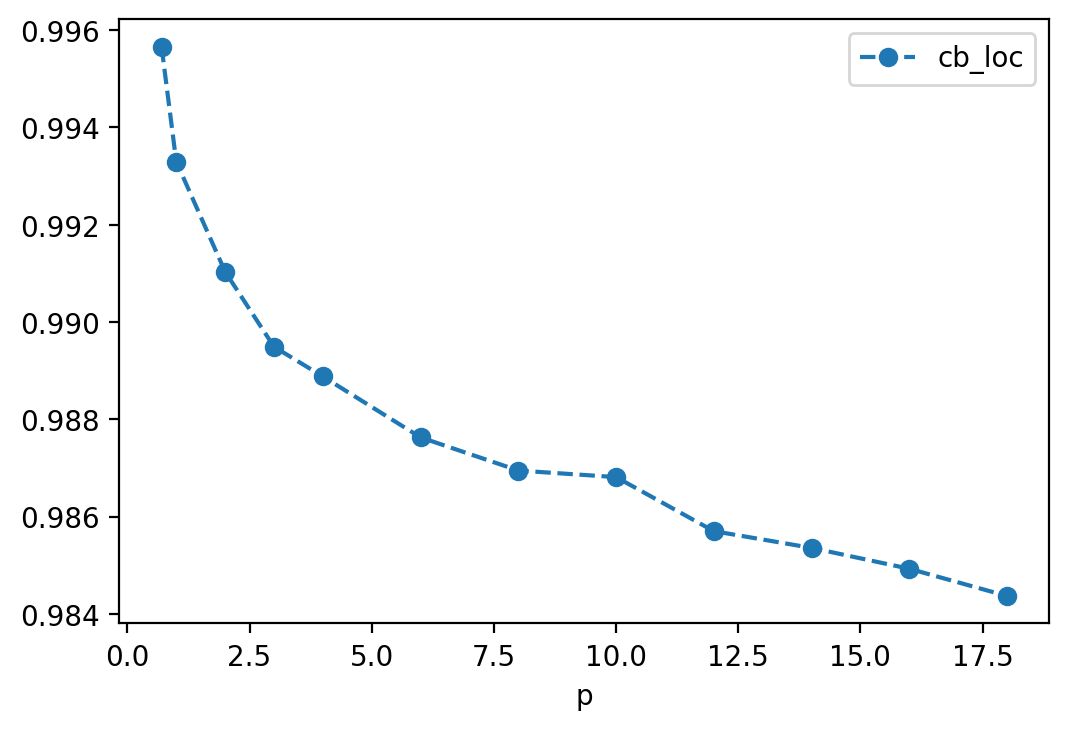

In [10]:
results.plot(x="p", y="cb_loc", style="o--")

<AxesSubplot:xlabel='p'>

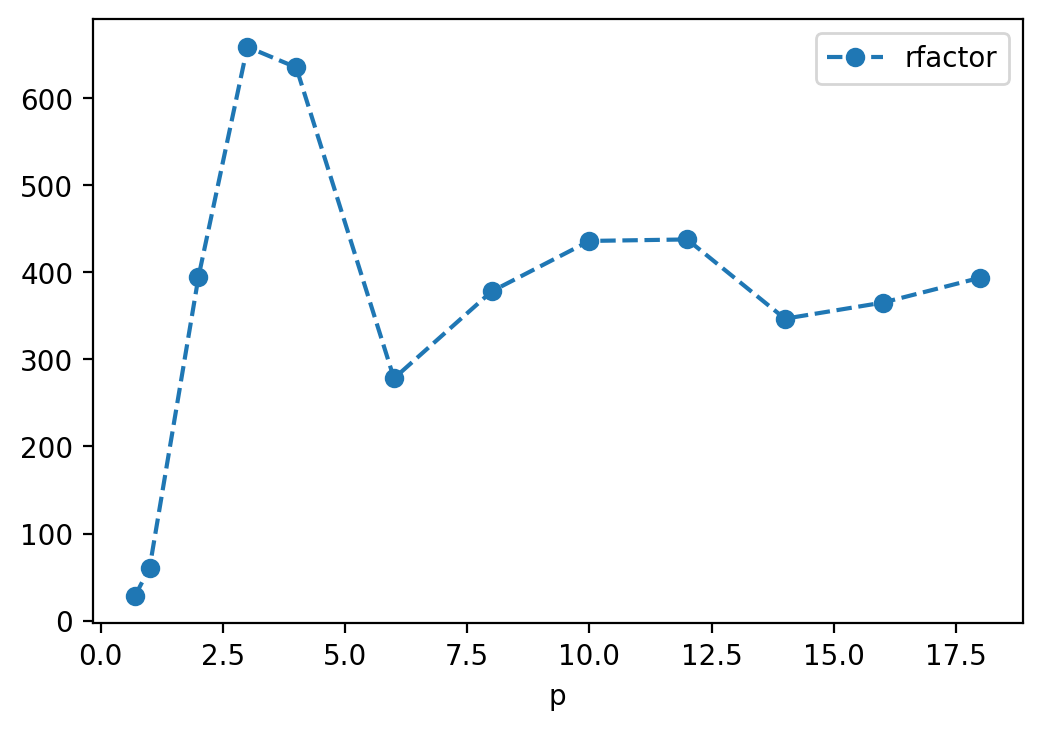

In [8]:
results.plot(x="p", y="rfactor", style="o--")

<AxesSubplot:xlabel='p'>

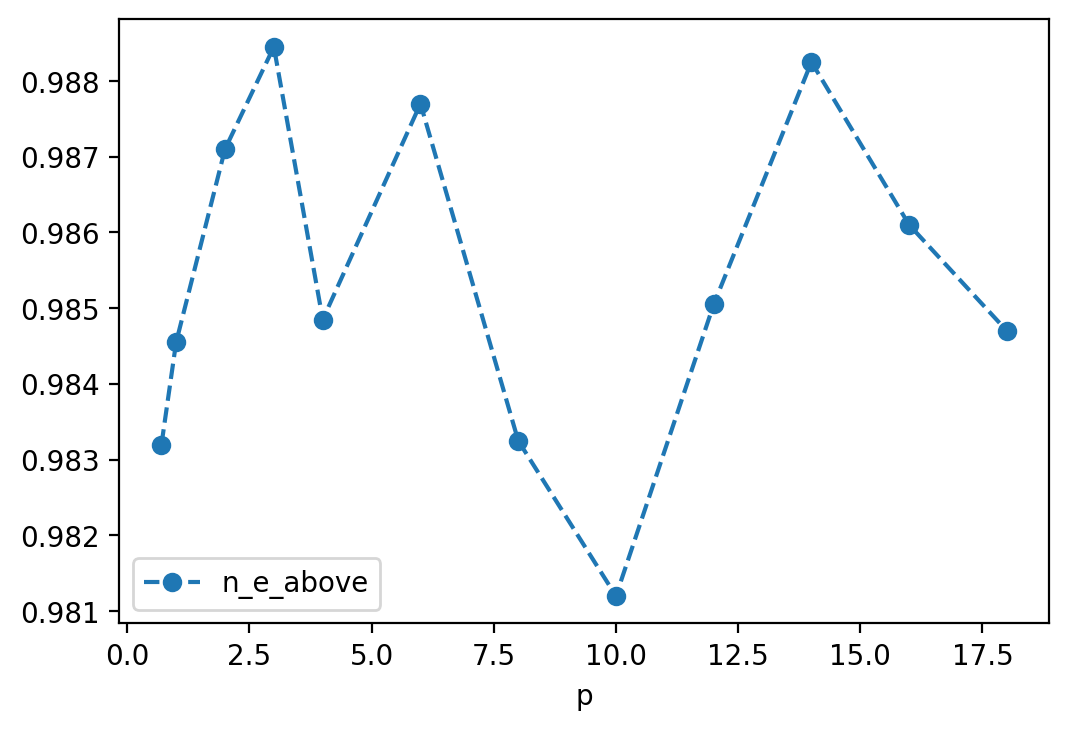

In [9]:
results.plot(x="p", y="n_e_above", style="o--")

<AxesSubplot:xlabel='p'>

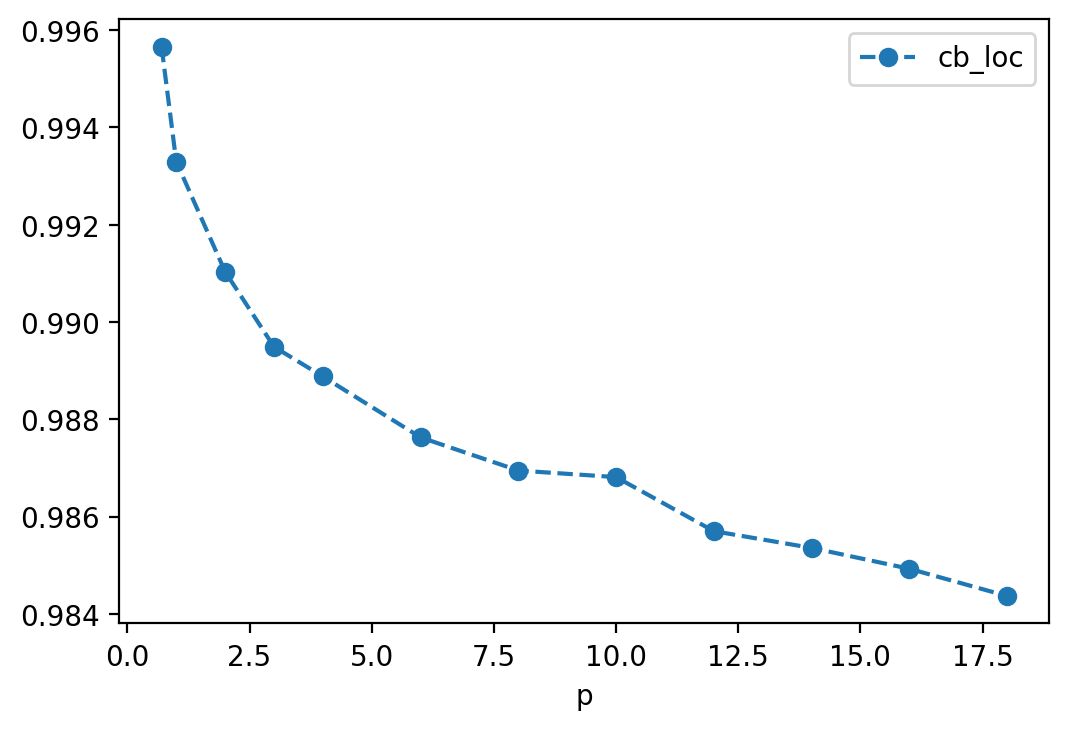

In [5]:
results.plot(x="p", y="cb_loc", style="o--")

<AxesSubplot:xlabel='p'>

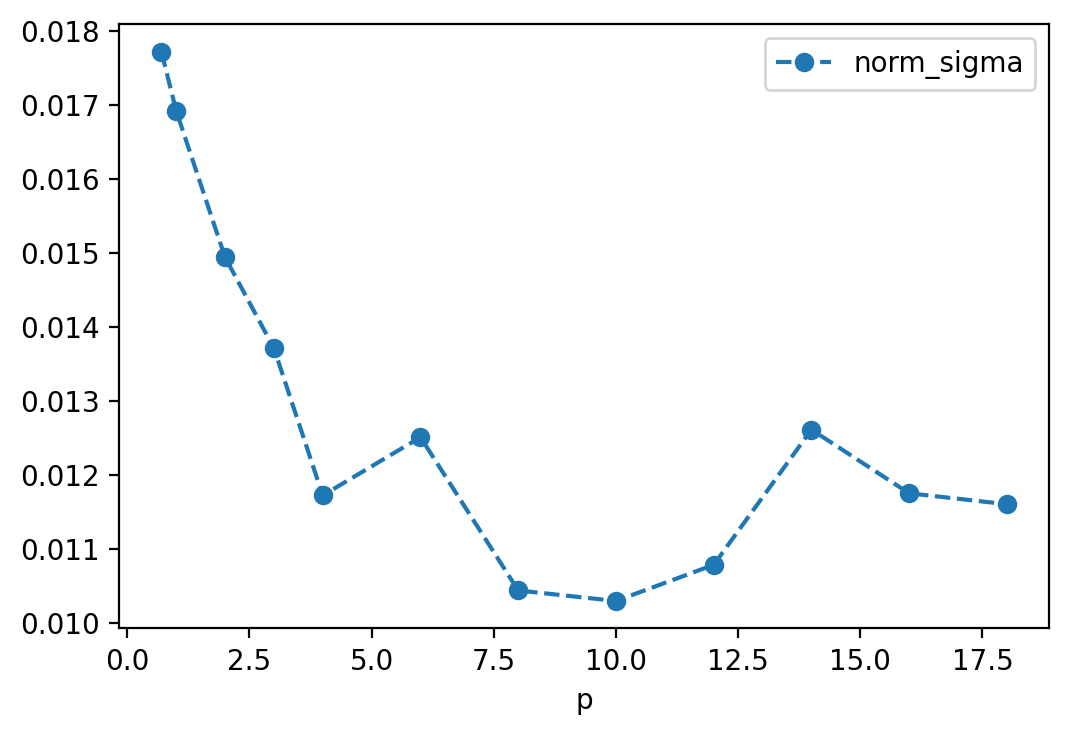

In [6]:
results.plot(x="p", y="norm_sigma", style="o--")

<AxesSubplot:xlabel='p'>

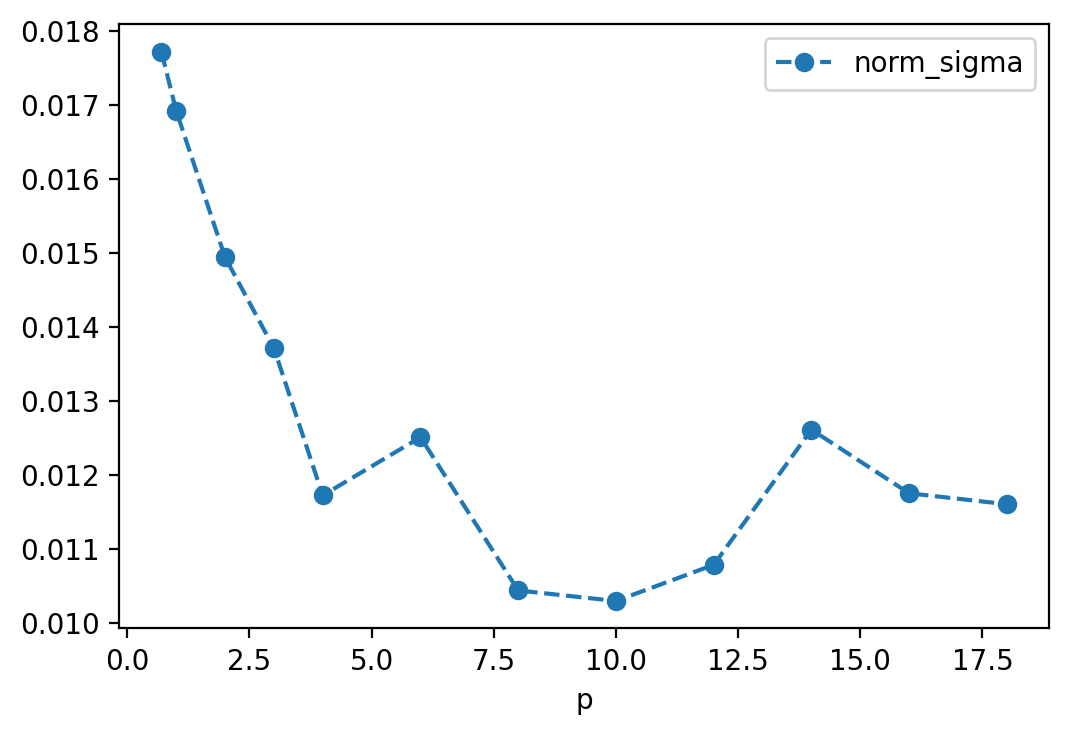

In [7]:
results.plot(x="p", y="norm_sigma", style="o--")